<a href="https://colab.research.google.com/github/marcelomrs/Estudos-de-Python/blob/master/exemplo_uso_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exemplo de uso do Algoritmo K-Means**

In [1]:
## import de bibliotecas necessárias

from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

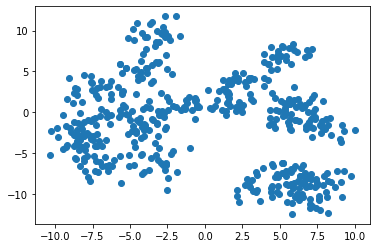

In [2]:
## Plota em um gráfico de dispersão 500 amostras aleatórias

X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

In [4]:
## cria uma função chamada optimal_number_of_clusters passando como parâmetro o cluster wcss para definir o número ótimo de cluster para a amostra
## identificamos o número de clusters onde a mudança no WCSS começa a se estabilizar (método do cotovelo)
## WCSS é definido como a soma da distância quadrada entre cada membro do cluster e seu centróide.

def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [5]:
## for executado junto com a função optimal_number_of_clusters(wcss) para identificar o número ideal de cluster para a amostra passada

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


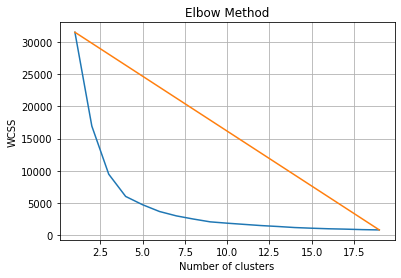

In [6]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()